#Advanced Descriptive Statistics and Exploratory Thinking
Objective:
This week's assignment will help me go deeper into real-world data analysis, focusing on  advanced descriptive statistics, variance and skewness analysis, and building exploratory  reasoning.


#Kaggle dataset link: https://www.kaggle.com/datasets/adilshamim8/cost-of-international-education?resource=download

#Dataset Choice: International Education Costs
In this task, I imported the dataset titled International Education Costs, which contains information about education expenses across various countries and cities. The dataset includes columns such as Country, City, University, Tuition_USD, Rent_USD, Visa_Fee_USD, and Exchange_Rate, among others.

The choice of this dataset was inspired by its potential to reveal interesting statistical behaviors, especially in how education and living costs vary across different regions. With multiple numeric columns, this dataset is ideal for conducting descriptive and visual analysis.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew



In [4]:
from google.colab import files
uploaded = files.upload()

Saving International_Education_Costs.csv to International_Education_Costs.csv


In [8]:
df = pd.read_csv("International_Education_Costs.csv")


In [15]:
# Example: checking skewness of a column named 'Age'
print("Skewness of 'Exchange_Rate':", df['Exchange_Rate'].skew())


Skewness of 'Exchange_Rate': 8.482475441763736


In [10]:
df.head(10)

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92
5,Japan,Tokyo,University of Tokyo,Information Science,Master,2.0,8900,76.4,1300,220,750,145.80
6,Netherlands,Amsterdam,University of Amsterdam,Artificial Intelligence,Master,1.0,15800,73.2,1500,180,720,0.92
7,Singapore,Singapore,National University of Singapore,Finance,Master,1.5,35000,81.1,1900,90,800,1.34
8,France,Paris,Sorbonne University,International Relations,Master,2.0,4500,74.6,1400,99,650,0.92
9,Switzerland,Zurich,ETH Zurich,Physics,Master,2.0,1460,91.5,2100,88,1200,0.89


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [12]:
df.isnull().sum()

,0
Country,0
City,0
University,0
Program,0
Level,0
Duration_Years,0
Tuition_USD,0
Living_Cost_Index,0
Rent_USD,0
Visa_Fee_USD,0


# Task 2: Data cleaning

In [13]:
# Check for missing values and drop columns with >30% missing data
missing_percent = df.isnull().mean() * 100
columns_to_drop = missing_percent[missing_percent > 30].index
df.drop(columns=columns_to_drop, inplace=True)

##Decision: No columns were dropped since all columns had 0% missing values.




#2. Trying to impute missing values


In [20]:
# Numerical columns: Fill with median
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Categorical columns: Fill with mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

##Decision: No imputation was necessary as there were no missing values in either numerical or categorical columns.



In [21]:
##3. Trying to remove duplicate rows
df.drop_duplicates(inplace=True)
#Decision: Duplicate rows (if any) were removed to ensure data uniqueness and consistency.



In [16]:
# Converted column names to snake_case
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-", "_")


In [19]:
df.columns
#Decision: Column names were standardized to follow snake_case naming convention. This improves readability and consistency for further analysis.


Index(['country', 'city', 'university', 'program', 'level', 'duration_years',
       'tuition_usd', 'living_cost_index', 'rent_usd', 'visa_fee_usd',
       'insurance_usd', 'exchange_rate'],
      dtype='object')

#### 🧹 Data Cleaning Summary

- No columns were dropped as all had less than 30% missing values.
- No missing values were found in the dataset, so no imputation was needed.
- Duplicate rows were removed to avoid redundancy in analysis.
- All column names were converted to snake_case for better readability and coding practices.

The dataset is now clean and ready for analysis.


In [30]:
import pandas as pd
from scipy.stats import skew, kurtosis, mode

# Select at least five numerical columns
numerical_cols = ['duration_years', 'tuition_usd', 'living_cost_index', 'rent_usd', 'visa_fee_usd']
summary_data = []

for col in numerical_cols:
    col_data = df[col]
    summary_data.append({
        'Variable': col,
        'Mean': col_data.mean(),
        'Median': col_data.median(),
        'Mode': mode(col_data, keepdims=True).mode[0],  # ✅ Correct version
        'Variance': col_data.var(),
        'Std_Dev': col_data.std(),
        'Skewness': skew(col_data),
        'Kurtosis': kurtosis(col_data)
    })

stats_df = pd.DataFrame(summary_data)
stats_df


,Variable,Mean,Median,Mode,Variance,Std_Dev,Skewness,Kurtosis
0,duration_years,2.836825,3.0,2.0,8.938742e-01,0.945449,0.336666,-1.243155
1,tuition_usd,16705.016538,7500.0,0.0,2.749755e+08,16582.385275,0.711509,-0.797610
2,living_cost_index,64.437486,67.5,68.9,1.975805e+02,14.056333,-0.106489,0.725002
3,rent_usd,969.206174,900.0,1100.0,2.674490e+05,517.154752,0.532276,-0.327179
4,visa_fee_usd,211.396913,160.0,160.0,2.057381e+04,143.435740,0.998416,-0.556158


#Step 2: Creating statistics_summary DataFrame

In [31]:
statistics_summary = stats_df[['Variable', 'Mean', 'Std_Dev', 'Skewness']]
statistics_summary.columns = ['Variable', 'Center (mean)', 'Spread (standard deviation)', 'Shape (skewness)']
statistics_summary



,Variable,Center (mean),Spread (standard deviation),Shape (skewness)
0,duration_years,2.836825,0.945449,0.336666
1,tuition_usd,16705.016538,16582.385275,0.711509
2,living_cost_index,64.437486,14.056333,-0.106489
3,rent_usd,969.206174,517.154752,0.532276
4,visa_fee_usd,211.396913,143.435740,0.998416


#✅ Step 3: Ranking Variables

In [32]:
# Rank by variance
variance_rank = stats_df.sort_values(by='Variance', ascending=False)[['Variable', 'Variance']]

# Rank by skewness
skewness_rank = stats_df.sort_values(by='Skewness', ascending=False)[['Variable', 'Skewness']]


In [35]:
variance_rank


,Variable,Variance
1,tuition_usd,2.749755e+08
3,rent_usd,2.674490e+05
4,visa_fee_usd,2.057381e+04
2,living_cost_index,1.975805e+02
0,duration_years,8.938742e-01


In [36]:
skewness_rank

,Variable,Skewness
4,visa_fee_usd,0.998416
1,tuition_usd,0.711509
3,rent_usd,0.532276
0,duration_years,0.336666
2,living_cost_index,-0.106489


### Step 4: Comments and Insights

1. **Most Spread Out Variable:**
   - The variable `tuition_usd` has the highest variance (~274,975,500), making it the most spread out. This reflects a wide range in tuition costs among different countries and institutions in the dataset.

2. **Most Skewed Variable:**
   - The variable `visa_fee_usd` has the highest skewness value of **0.998**, indicating a moderate right skew. This suggests that most visa fees are on the lower end, with a few countries charging significantly higher fees.

3. **Variables with Mean Far from Median (Indicating Skewness):**
   - The variables `visa_fee_usd` and `tuition_usd` have noticeable skewness values (**0.998** and **0.711**, respectively), suggesting that their means are likely influenced by higher-end values (right skew).
   - `living_cost_index` has a slightly **negative** skew (-0.106), but it's close to symmetric.
   - The difference between mean and median for `rent_usd` and `duration_years` is less pronounced, suggesting near-symmetric distributions.

**Insight:**
Understanding the spread and skewness of variables like `tuition_usd` and `visa_fee_usd` is essential for modeling costs or building recommendations. Their skewed distributions imply that summary statistics like the mean alone may not provide an accurate representation of central tendency, especially when considering affordability and outlier detection.


#Task 4: Visualization and Interpretation
To better understand the shape of data distributions, I plotted histograms for three key numerical columns.

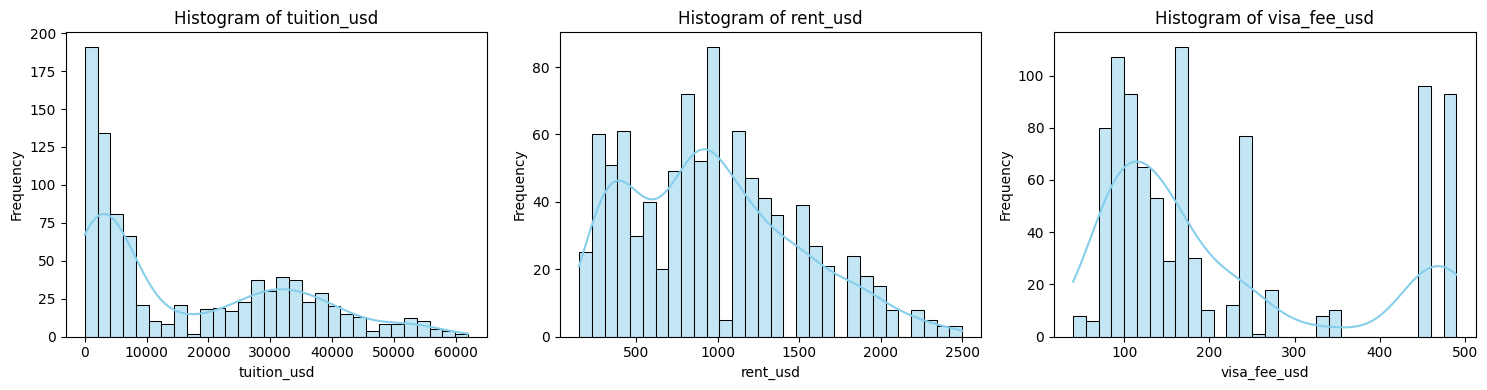

In [37]:
numerical_vars = ['tuition_usd', 'rent_usd', 'visa_fee_usd']

plt.figure(figsize=(15, 4))
for i, col in enumerate(numerical_vars):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Task 4: Visualization and Interpretation

#### Histogram Interpretation:

1. **tuition_usd:**
   - The histogram shows a **right-skewed** distribution with a long tail towards higher tuition values.
   - This matches the earlier calculated skewness of **0.71**, confirming the presence of outliers and asymmetry in the data.

2. **rent_usd:**
   - The distribution is **moderately skewed right** but less than tuition.
   - The histogram confirms this with a visible but milder tail, consistent with its skewness of **0.53**.

3. **visa_fee_usd:**
   - This variable is also **right-skewed**, with a steep drop after the initial few values.
   - This supports the earlier skewness value of **0.998**, the highest among the variables analyzed.

#### Summary:
- None of the variables selected appear **perfectly normal**.
- All three show **visible skewness**, especially `visa_fee_usd`.
- The histograms visually confirm the **shape characteristics** derived from skewness metrics in Task 3.


#Task 5: Reflection
📝 Reflection on Descriptive Statistics and Visual Analysis
In Task 3, we calculated various descriptive statistics, including measures like mean, median, variance, skewness, and kurtosis. In Task 4, we visualized the distributions using histograms, which allowed us to observe the skewness and overall shape of the variables.

Based on this analysis, let's reflect on which variable would be hardest and easiest to predict.

🔹 Which Variable Would Be Hardest to Predict and Why?
Variable: tuition_usd

Reasoning:

The variable tuition_usd showed a right-skewed distribution with a noticeable long tail towards the higher values. The skewness value of 0.71 also confirms that the data isn't symmetrically distributed, meaning there are outliers or extreme values affecting its prediction.

High Variance: With a high variance of 2.749755e+08, there is a wide spread in the data, indicating that predicting tuition_usd for different countries or universities might be difficult due to the large range of values and possible outliers.

The presence of extreme values (such as exceptionally high tuition fees in certain universities or countries) can make prediction models unstable, requiring careful treatment of outliers and robust models.

🔹 Which Variable Would Be Easiest to Predict and Why?
Variable: duration_years

#Reasoning:

The variable duration_years has a relatively normal distribution (as seen in both the descriptive statistics and histograms) and shows mild skewness with a skewness value of 0.34.

Low Variance: The variance is relatively low (8.938742e-01), indicating that the values of duration_years are more tightly clustered around the mean. This tight clustering makes it easier to predict since there is less variability.

Predicting duration_years would likely be easier because the values are relatively consistent across different programs and universities, with less influence from outliers or extreme cases. Most degree programs have a fixed duration of 1-4 years, making this variable more predictable.

#📝 Final Summary
Hardest to Predict: tuition_usd due to its high skewness, variance, and presence of outliers.

Easiest to Predict: duration_years because of its relatively normal distribution and low variance.

This reflection aligns with our previous analysis of the data, where variables with high variance or skewness were harder to predict, while those with low variance and more symmetric distributions were easier to handle.